<a href="https://colab.research.google.com/github/isaacd68/MAT421/blob/main/1_1%2C1_2%2C1_3%2C1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Combinations in Python

Any integer between -40 and 40 can be written as a linear combination of 1, 3, 9, 27 with scalars being elements of the set {-1, 0, 1}. For example: 7 = 1 · 1 + (-1) · 3 + 1 · 9 + 0 · 27

We can calculate these scalars with Python. First we need a generator generating all the possible scalar combinations.

In [1]:
def factors_set():
    for i in [-1, 0, 1]:
        for j in [-1,0,1]:
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    yield (i, j, k, l)  

use the memoize() technique to memorize previous results.

In [2]:

def memoize(f):
    results = {}
    def helper(n):
        if n not in results:
            results[n] = f(n)
        return results[n]
    return helper

in our function linear_combination() we check every scalar tuple, if it can create the value n.

In [3]:

@memoize
def linear_combination(n):
    """ returns the tuple (i,j,k,l) satisfying
        n = i*1 + j*3 + k*9 + l*27      """
    weighs = (1,3,9,27)
      
    for factors in factors_set():
       sum = 0
       for i in range(len(factors)):
          sum += factors[i] * weighs[i]
       if sum == n:
          return factors

Putting all toghether we have:

In [4]:
# Linear combination of vectors
import numpy as np
def factors_set():
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            for k in [-1, 0, 1]:
                for l in [-1, 0, 1]:
                    yield (i, j, k, l)  


def memoize(f):
    results = {}
    def helper(n):
        if n not in results:
            results[n] = f(n)
        return results[n]
    return helper

@memoize
def linear_combination(n):
    """ returns the tuple (i,j,k,l) satisfying
        n = i*1 + j*3 + k*9 + l*27      """
    weighs = (1, 3, 9, 27)
      
    for factors in factors_set():
       sum = 0
       for i in range(len(factors)):
          sum += factors[i] * weighs[i]
       if sum == n:
          return factors

# calculate the linear combinations of the first 10 positive integers:
for i in range(1,11):
    print(linear_combination(i))

(1, 0, 0, 0)
(-1, 1, 0, 0)
(0, 1, 0, 0)
(1, 1, 0, 0)
(-1, -1, 1, 0)
(0, -1, 1, 0)
(1, -1, 1, 0)
(-1, 0, 1, 0)
(0, 0, 1, 0)
(1, 0, 1, 0)


# Othogonality in Python

First, we'll create two vectors

In [5]:
v1 = np.array([1,-2, 4])
v2 = np.array([2, 5, 2])

We can perform the dot product of the vectors using standard calculation

In [6]:
dot_product = np.sum(v1 * v2)

print("The dot product of v1 and v2 is", dot_product )

The dot product of v1 and v2 is 0


Or use numpy version

In [7]:
import numpy as np
dot_product = np.dot(v1,v2)

print("The dot product of v1 and v2 is", dot_product )

The dot product of v1 and v2 is 0


Calculating the length of each vector

In [8]:
n1 = np.sqrt(np.sum(v1 * v1))
n2 = np.sqrt(np.sum(v2 * v2))

print('The L2 norm of v1 is', n1)
print('The L2 norm of v2 is', n2)

The L2 norm of v1 is 4.58257569495584
The L2 norm of v2 is 5.744562646538029


Or in numpy

In [9]:
import numpy as np
n1 = np.linalg.norm(v1, ord=2)
n2 = np.linalg.norm(v2, ord=2)

print('The L2 norm of v1 is', n1)
print('The L2 norm of v2 is', n2)

The L2 norm of v1 is 4.58257569495584
The L2 norm of v2 is 5.744562646538029


2D representation of orthogonal vectors

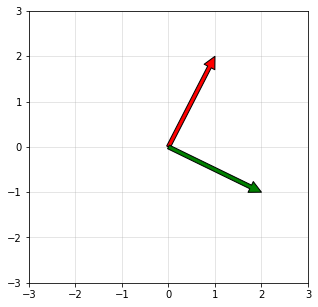

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.grid(alpha=0.4)
ax.set(xlim=(-3, 3), ylim=(-3, 3))

v1 = np.array([1,  2])
v2 = np.array([2, -1])

# Plot the orthogonal vectors
ax.annotate('', xy=v1, xytext=(0, 0), arrowprops=dict(facecolor='r'))
ax.annotate('', xy=v2, xytext=(0, 0), arrowprops=dict(facecolor='g'))
plt.show()

And in 3D

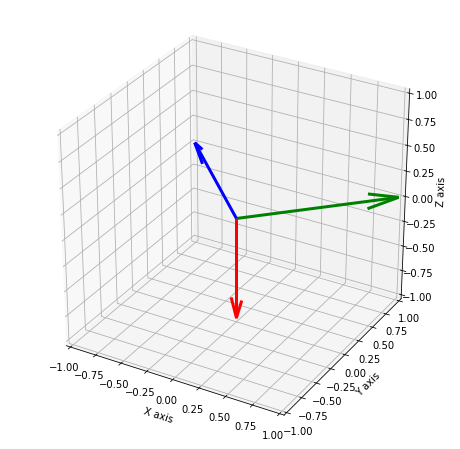

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 3D representation of the orthogonal vectors
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the orthogonal vectors
v1 = np.array([ 0, 0, -1])
v2 = np.array([ 1, 1, 0])
v3 = np.array([-1, 1, 0])
 
# Plot the orthogonal vectors
ax.quiver( 0, 0, 0, v1[0], v1[1], v1[2], color = 'r', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v2[0], v2[1], v2[2], color = 'g', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v3[0], v3[1], v3[2], color = 'b', lw=3, arrow_length_ratio=0.2)

ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

# Eigenvalues/vectors in Python

The function scipy.linalg.eig computes eigenvalues and eigenvectors of a square matrix. Let's consider a simple example with a diagonal matrix:

In [12]:
import numpy as np
A = np.array([[1,0],[0,-2]])
print(A)

[[ 1  0]
 [ 0 -2]]


The function la.eig returns a tuple (eigvals,eigvecs) where eigvals is a 1D NumPy array of complex numbers giving the eigenvalues of  A , and eigvecs is a 2D NumPy array with the corresponding eigenvectors in the columns:

In [14]:
results = np.linalg.eig(A)

The eigenvalues of  A  are:

In [15]:
print(results[0])

[ 1. -2.]


The corresponding eigenvectors are:

In [16]:
print(results[1])

[[1. 0.]
 [0. 1.]]


We can unpack the tuple:

In [18]:
eigvals, eigvecs = np.linalg.eig(A)
print(eigvals)

[ 1. -2.]


In [19]:
print(eigvecs)

[[1. 0.]
 [0. 1.]]


If we know that the eigenvalues are real numbers (ie. if  A  is symmetric), then we can use the NumPy array method .real to convert the array of eigenvalues to real numbers:

In [20]:
eigvals = eigvals.real
print(eigvals)

[ 1. -2.]


Notice that the position of an eigenvalue in the array eigvals correspond to the column in eigvecs with its eigenvector:

In [ ]:
lambda1 = eigvals[1]
print(lambda1)

In [22]:
v1 = eigvecs[:,1].reshape(2,1)
print(v1)

[[0.]
 [1.]]


In [23]:
A @ v1

array([[ 0.],
       [-2.]])

In [24]:
lambda1 * v1

array([[-0.],
       [-2.]])

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

A = np.array([[1,0],[0,-2]])
print(A)

results = la.eig(A)
print(results[0])
print(results[1])

eigvals, eigvecs = la.eig(A)
print(eigvals)
print(eigvecs)

eigvals = eigvals.real
print(eigvals)

lambda1 = eigvals[1]
print(lambda1)

v1 = eigvecs[:,1].reshape(2,1)
print(v1)

A @ v1

lambda1 * v1

[[ 1  0]
 [ 0 -2]]
[ 1.+0.j -2.+0.j]
[[1. 0.]
 [0. 1.]]
[ 1.+0.j -2.+0.j]
[[1. 0.]
 [0. 1.]]
[ 1. -2.]
-2.0
[[0.]
 [1.]]


array([[-0.],
       [-2.]])


# QR Decompostion

To calculate the QR Decomposition of a matrix with NumPy/SciPy, we can make use of the built-in linalg library via the linalg.qr function. This is significantly more efficient than using a pure Python implementation:

In [26]:
import pprint
import numpy as np
import scipy.linalg   # SciPy Linear Algebra Library

A = np.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])  
Q, R = scipy.linalg.qr(A)

print ("A:")
pprint.pprint(A)

print ("Q:")
pprint.pprint(Q)

print ("R:")
pprint.pprint(R)

A:
array([[ 12, -51,   4],
       [  6, 167, -68],
       [ -4,  24, -41]])
Q:
array([[-0.85714286,  0.39428571,  0.33142857],
       [-0.42857143, -0.90285714, -0.03428571],
       [ 0.28571429, -0.17142857,  0.94285714]])
R:
array([[ -14.,  -21.,   14.],
       [   0., -175.,   70.],
       [   0.,    0.,  -35.]])


The output of R is a check to make sure it is an upper triangular matrix.

Using the Householder Reflections algorithim to have a better idea for QR decomposition in python.

In [27]:
from math import sqrt
from pprint import pprint
import math
import numpy as np
import scipy.linalg

A = np.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])  
Q, R = scipy.linalg.qr(A)

print ("A:")
pprint(A)

print ("Q:")
pprint(Q)

print ("R:")
pprint(R) 

def mult_matrix(M, N):
    """Multiply square matrices of same dimension M and N"""
    # Converts N into a list of tuples of columns                                                                     
    tuple_N = zip(*N)

    # Nested list comprehension to calculate matrix multiplication                                                    
    return [[sum(el_m * el_n for el_m, el_n in zip(row_m, col_n)) for col_n in tuple_N] for row_m in M]

def trans_matrix(M):
    """Take the transpose of a matrix."""
    n = len(M)
    return [[ M[i][j] for i in range(n)] for j in range(n)]

def norm(x):
    """Return the Euclidean norm of the vector x."""
    return sqrt(sum([x_i**2 for x_i in x]))

def Q_i(Q_min, i, j, k):
    """Construct the Q_t matrix by left-top padding the matrix Q                                                      
    with elements from the identity matrix."""
    if i < k or j < k:
        return float(i == j)
    else:
        return Q_min[i-k][j-k]

def householder(A):
    """Performs a Householder Reflections based QR Decomposition of the                                               
    matrix A. The function returns Q, an orthogonal matrix and R, an                                                  
    upper triangular matrix such that A = QR."""
    n = len(A)

    # Set R equal to A, and create Q as a zero matrix of the same size
    R = A
    Q = [[0.0] * n for i in range(n)]

    # The Householder procedure
    for k in range(n-1):  # We don't perform the procedure on a 1x1 matrix, so we reduce the index by 1
        # Create identity matrix of same size as A                                                                    
        I = [[float(i == j) for i in range(n)] for j in range(n)]
    
        # Create the vectors x, e and the scalar alpha
        ang = 0
        x = [row[k] for row in R[k:]]
        e = [row[k] for row in I[k:]]
        alpha = -math.copysign(x[0], ang) * norm(x)

        # Using anonymous functions, we create u and v
        u = map(lambda p,q: p + alpha * q, x, e)
        norm_u = norm(u)
        v = map(lambda p: p/norm_u, u)

        # Create the Q minor matrix
        Q_min = [[float(i==j) - 2.0 * v[i] * v[j] for i in range(n-k)] for j in range(n-k)]
        for i in range(n-k):
              print(i)
        for j in range(n-k):
              print(j) 
        # "Pad out" the Q minor matrix with elements from the identity
        Q_t = [[Q_i(Q_min,i,j,k) for i in range(n)] for j in range(n)]

        # If this is the first run through, right multiply by A,
        # else right multiply by Q
        if k == 0:
            Q = Q_t
            R = mult_matrix(Q_t,A)
        else:
            Q = mult_matrix(Q_t,Q)
            R = mult_matrix(Q_t,R)

    # Since Q is defined as the product of transposes of Q_t,
    # we need to take the transpose upon returning it
    return trans_matrix(Q), R

A = [[12, -51, 4], [6, 167, -68], [-4, 24, -41]]
Q, R = householder(A)

print ("A:")
pprint(A)

print ("Q:")
pprint(Q)

print ("R:")
pprint(R)

A:
array([[ 12, -51,   4],
       [  6, 167, -68],
       [ -4,  24, -41]])
Q:
array([[-0.85714286,  0.39428571,  0.33142857],
       [-0.42857143, -0.90285714, -0.03428571],
       [ 0.28571429, -0.17142857,  0.94285714]])
R:
array([[ -14.,  -21.,   14.],
       [   0., -175.,   70.],
       [   0.,    0.,  -35.]])


TypeError: ignored

# Least Squares in python

Generate data using the scikit-learn library.

In [31]:
import sklearn
from sklearn import datasets
X, y, coefficients = sklearn.datasets.make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

Store the the rank and the number of columns of the matrix as variables.

In [32]:
n = X.shape[1]
r = np.linalg.matrix_rank(X)

Find the equivalent to our matrix of features using singular value decomposition

In [33]:
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

D+  can be derived from sigma

In [34]:
D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

V is of course equal to the transpose of its transpose as described in the following identity.

Determine Moore-Penrose pseudoinverse of X.

In [39]:
V=VT.T
X_plus = V.dot(D_plus).dot(U.T)

The vector of coefficients can be calculated by multiplying the pseudoinverse of the matrix X by y

In [40]:
w = X_plus.dot(y)

The actual error, we compute the residual sum of squares using the very first equation we saw.

In [41]:
error = np.linalg.norm(X.dot(w) - y, ord=2) ** 2

All together:

In [38]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

n = X.shape[1]
r = np.linalg.matrix_rank(X)

U, sigma, VT = np.linalg.svd(X, full_matrices=False)

D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

V = VT.T

X_plus = V.dot(D_plus).dot(U.T)

w = X_plus.dot(y)

error = np.linalg.norm(X.dot(w) - y, ord=2) ** 2
print(error)

888.9637001387936


# Linear Regression in Python

The second step is defining data to work with. The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects. This is the simplest way of providing data for regression:

Now, you have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

As you can see, x has two dimensions, and x.shape is (6, 1), while y has a single dimension, and y.shape is (6,).

Let’s create an instance of the class LinearRegression, which will represent the regression mode

This statement creates the variable model as the instance of LinearRegression. You can provide several optional parameters to LinearRegression

With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. That’s why you can replace the last two statements with this one

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.

You can obtain the coefficient of determination (R2) with .score() called on model

When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is R2.

The attributes of model are .intercept_, which represents the coefficient, b0 and .coef_, which represents b1

The code above illustrates how to get b0 and b1. You can notice that .intercept_ is a scalar, while .coef_ is an array.

The value b0 = 5.63 (approximately) illustrates that your model predicts the response 5.63 when x is zero. The value b1 = 0.54 means that the predicted response rises by 0.54 when x is increased by one.

You should notice that you can provide y as a two-dimensional array as well. In this case, you’ll get a similar result. This is how it might look

this example is very similar to the previous one, but in this case, .intercept_ is a one-dimensional array with the single element b0, and .coef_ is a two-dimensional array with the single element b1

To obtain the predicted response, use .predict()

When applying .predict(), you pass the regressor as the argument and get the corresponding predicted response.

This is a nearly identical way to predict the response

In this case, you multiply each element of x with model.coef_ and add model.intercept_ to the product.

The output here differs from the previous example only in dimensions. The predicted response is now a two-dimensional array, while in the previous case, it had one dimension.

If you reduce the number of dimensions of x to one, these two approaches will yield the same result. You can do this by replacing x with x.reshape(-1), x.flatten(), or x.ravel() when multiplying it with model.coef_.

In practice, regression models are often applied for forecasts. This means that you can use fitted models to calculate the outputs based on some other, new inputs

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
print(x)
print(y)

model = LinearRegression()

model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]
coefficient of determination: 0.7158756137479542
intercept: 5.633333333333329
slope: [0.54]
intercept: [5.63333333]
slope: [[0.54]]
predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]
[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]



# Singular Value Decompostion

In [43]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

In [44]:
X, y = load_digits(return_X_y=True)

The dataset contains 1797 8x8 images. If you specify return_X_y=True the function will return the pixels as a one dimensional array.

In [45]:
X.shape

(1797, 64)

In [46]:
y

array([0, 1, 2, ..., 8, 9, 8])

Let’s take a look at the first digit. As we can see, it’s simply an array of length 64 containing the pixel intensities.

In [47]:
image = X[0]

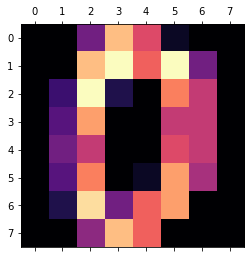

In [48]:
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'magma')

Next, we’ll use Singular Value Decomposition to see whether we are able to reconstruct the image using only 2 features for each row. The s matrix returned by the function must be converted into a diagonal matrix using the diag method. By default, diag will create a matrix that is n x n, relative to the original matrix. This causes a problem as the size of the matrices no longer follow the rule of matrix multiplication where the number of columns in a matrix must match the number of rows in the other matrix. Therefore, we create a new m x n matrix and populate the first n x n part of it with the diagonal matrix.

In [49]:
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[0.00 -1.10 4.74 12.16 9.52 2.44 -1.33 0.00]
 [0.00 1.81 15.31 13.79 11.23 12.27 4.48 0.00]
 [0.00 3.86 13.36 1.19 1.49 12.59 7.65 0.00]
 [0.00 3.39 10.76 -0.35 0.20 10.36 6.61 0.00]
 [0.00 3.11 9.52 -0.85 -0.24 9.26 6.04 0.00]
 [0.00 3.61 11.79 0.12 0.60 11.27 7.07 0.00]
 [0.00 2.08 12.63 8.58 7.13 10.60 4.66 0.00]
 [0.00 -1.18 4.88 12.71 9.96 2.47 -1.44 0.00]]


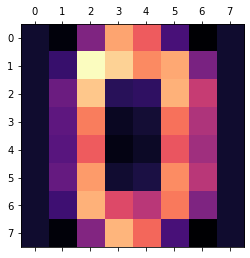

In [50]:
plt.matshow(A, cmap = 'magma')

We can get the reduced feature space by taking the dot product of the U and S matrices.

In [51]:
U.dot(S)

array([[10.97, -12.23],
       [26.04, -6.82],
       [18.73, 7.95],
       [14.60, 8.08],
       [12.72, 7.84],
       [16.19, 8.21],
       [20.45, -2.05],
       [11.36, -12.85]])

**Another Singular Value Decompostion example**

In [53]:
from numpy.linalg import eigh
import time
import scipy.sparse
import numpy as np
from django.contrib import admin
from django.urls import path, include
from django.apps import AppConfig
class UiConfig(AppConfig):
      name = 'ui'

from ui.base import PyMFBase3, eighk

try:
    import scipy.sparse.linalg.eigen.arpack as linalg
except (ImportError, AttributeError):
    import scipy.sparse.linalg as linalg


def pinv(A, k=-1, eps= np.finfo(float).eps):    
    # Compute Pseudoinverse of a matrix   
    svd_mdl =  SVD(A, k=k)
    svd_mdl.factorize()
    
    S = svd_mdl.S
    Sdiag = S.diagonal()
    Sdiag = np.where(Sdiag>eps, 1.0/Sdiag, 0.0)
    
    for i in range(S.shape[0]):
        S[i,i] = Sdiag[i]

    if scipy.sparse.issparse(A):            
        A_p = svd_mdl.V.transpose() * (S * svd_mdl.U.transpose())
    else:    
        A_p = np.dot(svd_mdl.V.T, np.core.multiply(np.diag(S)[:,np.newaxis], svd_mdl.U.T))

    return A_p


class SVD(PyMFBase3):    
 

  data = np.array([[1.0, 0.0, 2.0], [0.0, 1.0, 1.0]])
  svd_mdl = SVD(data)    
  svd_mdl.factorize()


  def _compute_S(self, values):
      

      self.S = np.diag(np.sqrt(values))
        
      # and the inverse of it
      S_inv = np.diag(np.sqrt(values)**-1.0)
      return S_inv

   
  def factorize(self):    

       def _right_svd():            
           AA = np.dot(self.data[:,:], self.data[:,:].T)
                   # argsort sorts in ascending order -> access is backwards
           values, self.U = eighk(AA, k=self._k)

            # compute S
           self.S = np.diag(np.sqrt(values))
            
            # and the inverse of it
           S_inv = self._compute_S(values)
                    
            # compute V from it
           self.V = np.dot(S_inv, np.dot(self.U[:,:].T, self.data[:,:]))    
            
        
       def _left_svd():
            AA = np.dot(self.data[:,:].T, self.data[:,:])
            
            values, Vtmp = eighk(AA, k=self._k)
            self.V = Vtmp.T 

            # and the inverse of it
            S_inv = self._compute_S(values)

            self.U = np.dot(np.dot(self.data[:,:], self.V.T), S_inv)                
    
       def _sparse_right_svd():
            ## for some reasons arpack does not allow computation of rank(A) eigenvectors (??)    #
           AA = self.data*self.data.transpose()
            
           if self.data.shape[0] > 1:                    
                # only compute a few eigenvectors ...
              if self._k > 0 and self._k < self.data.shape[0]-1:
                   k = self._k
              else:
                  k = self.data.shape[0]-1
                  values, u_vectors = linalg.eigsh(AA,k=k)
           else:                
               values, u_vectors = eigh(AA.todense())
            
            # get rid of negative/too low eigenvalues   
               s = np.where(values > self._EPS)[0]
               u_vectors = u_vectors[:, s] 
               values = values[s]
            
            # sort eigenvectors according to largest value
            # argsort sorts in ascending order -> access is backwards
               idx = np.argsort(values)[::-1]
               values = values[idx]                        
            
               self.U = scipy.sparse.csc_matrix(u_vectors[:,idx])
                    
            # compute S
               tmp_val = np.sqrt(values)            
               l = len(idx)
               self.S = scipy.sparse.spdiags(tmp_val, 0, l, l,format='csc') 
            
            # and the inverse of it            
               S_inv = scipy.sparse.spdiags(1.0/tmp_val, 0, l, l,format='csc')
            
            # compute V from it
               self.V = self.U.transpose() * self.data
               self.V = S_inv * self.V
    
       def _sparse_left_svd():        
            # for some reasons arpack does not allow computation of rank(A) eigenvectors (??)
           AA = self.data.transpose()*self.data
    
           if self.data.shape[1] > 1:                
                # do not compute full rank if desired
               if self._k > 0 and self._k < AA.shape[1]-1:
                  k = self._k
               else:
                  k = self.data.shape[1]-1
                
               values, v_vectors = linalg.eigsh(AA,k=k)                    
           else:                
               values, v_vectors = eigh(AA.todense())    
           
            # get rid of negative/too low eigenvalues   
           s = np.where(values > self._EPS)[0]
           v_vectors = v_vectors[:, s] 
           values = values[s]
            
            # sort eigenvectors according to largest value
           idx = np.argsort(values)[::-1]                  
           values = values[idx]
            
            # argsort sorts in ascending order -> access is backwards            
           self.V = scipy.sparse.csc_matrix(v_vectors[:,idx])      
            
            # compute S
           tmp_val = np.sqrt(values)            
           l = len(idx)      
           self.S = scipy.sparse.spdiags(tmp_val, 0, l, l,format='csc') 
            
            # and the inverse of it                                         
           S_inv = scipy.sparse.spdiags(1.0/tmp_val, 0, l, l,format='csc')
            
           self.U = self.data * self.V * S_inv        
           self.V = self.V.transpose()           
        
       if self._rows >= self._cols:
          if scipy.sparse.issparse(self.data):                
               _sparse_left_svd()
          else:            
              _left_svd()
       else:
           if scipy.sparse.issparse(self.data):
              _sparse_right_svd()
           else:            
               _right_svd()

def _test():
    import doctest
    doctest.testmod()
 


ModuleNotFoundError: ignored

# Principal Component Analysis

In [54]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [56]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

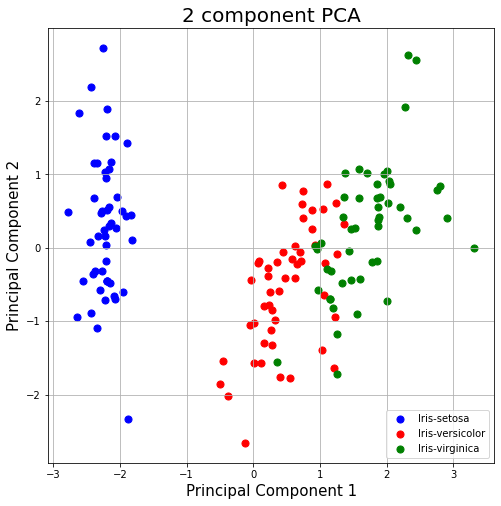

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()